## lecture 180 to 183
### 3 Exhaustively GridSearchCV
### Task 1

SPlit data into TEST,TRAIN, VALIDATION sets
### Task 2
The parameters we are going to use

## .max_depth
## .max_features 
## .min_samples_split
## .min_samples_leaf
## .n_estimators

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots ko notebook ke andar dikhane ke liye
%matplotlib inline
import seaborn as sns

In [2]:
# Using the full path you provided

# File ka path set karein
file_path = "/home/time/Desktop/python_Projects/Python_ka_onion/Data/heart_disease_300.csv"

# Data load karein
heart_disease = pd.read_csv(file_path)

# Shuruati data check karein
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,122,139,1,1,168,0,2.2,1,1,0,0
1,57,0,0,154,232,1,2,108,0,4.1,1,2,0,0
2,43,0,3,107,259,0,0,84,0,4.9,1,3,1,1
3,71,1,2,185,166,1,2,188,1,5.7,2,3,0,1
4,36,0,0,138,120,1,1,98,1,1.5,2,0,1,0


# Task 1

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_hyper_metrics(y_true, y_predicted): # Ek naya function banaya jo asli labels (y_true) aur model ki predictions (y_predicted) ko compare karega.
    """This function return the Evaluation Metrics""" # Yeh ek 'docstring' hai jo batati hai ke yeh function model ki performance check karne ke kaam aata hai.
    
    accuracy = accuracy_score(y_true, y_predicted) # Yeh line check karti hai ke model ne total kitne sahi jawab diye (Accuracy).
    precision = precision_score(y_true, y_predicted) # Yeh batati hai ke jab model ne 'Positive' kaha, toh woh kitni baar waqai sahi tha (Precision).
    recall = recall_score(y_true, y_predicted) # Yeh check karti hai ke model ne saare asli 'Positive' cases mein se kitno ko pehchana (Recall).
    f1 = f1_score(y_true, y_predicted) # Yeh Precision aur Recall ka balance (average) nikaalti hai.
    
    metrics_dict = {"Accuracy": round(accuracy, 2), # Saari values ko ek dictionary mein save kiya ja raha hai taake baad mein asaani se use ho sakein.
                    "precision": round(precision, 2), 
                    "recall": round(recall, 2), 
                    "f1": round(f1, 2)}
    
    print(f"Accuracy: {round(accuracy, 2)}") # Screen par Accuracy ki value print hogi.
    print(f"precision: {round(precision, 2)}") # Screen par Precision ki value dikhayi degi.
    print(f"Recall: {round(recall, 2)}") # Screen par Recall ki value print hogi.
    print(f"f1: {round(f1, 2)}") # Screen par F1 score dikhayi dega.
    
    return metrics_dict # Yeh line ab uncomment hai, taake aapka result variables (first_result, etc.) mein save ho sake.

In [4]:
#Train
#Validate
#Test

# Shuffle the data
mixed_heart_disease = heart_disease.sample(frac=1)

# Split into X (features) and y (labels)
X = mixed_heart_disease.drop('target', axis=1)
y = mixed_heart_disease['target']

# Calculate split indices for Train (70%), Validate (15%), and Test (15%)
train_split = round(0.7 * len(mixed_heart_disease))
valid_split = round(train_split + 0.15 * len(mixed_heart_disease))

# Final Splitting
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [5]:
len(mixed_heart_disease)

303

In [6]:
len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [7]:
#Fisrt Model results
np.random.seed(7)
from sklearn.ensemble import  RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
#Base line Prediction
y_predicted = clf.predict(X_valid)
# Evaluating the model
first_result = evaluate_hyper_metrics(y_valid,y_predicted)

first_result



Accuracy: 0.4
precision: 0.29
Recall: 0.25
f1: 0.27


{'Accuracy': 0.4, 'precision': 0.29, 'recall': 0.25, 'f1': 0.27}

# SKLEARN-PART 5
### 184 STEP 5 ::Hyperparameters Comparison

In [8]:
# Dusre model ka result nikaalne ka process
np.random.seed(7)
clf2 = RandomForestClassifier(n_estimators=10) # Ek naya model banaya jisme 10 'trees' (n_estimators) istemal kiye gaye hain.
clf2.fit(X_train, y_train) # Model ko training data dikha kar sikhaya ja raha hai.

# Baseline Prediction
y_predicted = clf2.predict(X_valid) # Sikha hua model ab Validation data par apne tukke (predictions) laga raha hai.

# Evaluating the model
second_result = evaluate_hyper_metrics(y_valid, y_predicted) # Aapka banaya hua function asli labels aur predictions ko compare kar raha hai.
second_result # Screen par final metrics ka result dikhane ke liye.

Accuracy: 0.53
precision: 0.46
Recall: 0.3
f1: 0.36


{'Accuracy': 0.53, 'precision': 0.46, 'recall': 0.3, 'f1': 0.36}

In [9]:
# Teesre model ka result (Manual Tuning)
np.random.seed(7) # Isse randomness control hogi taake har baar result ek jaisa aaye.

# Model setup: Sirf single values istemal karein
clf3 = RandomForestClassifier(n_estimators=100, 
                              max_depth=10) # 100 trees aur 10 ki depth set ki.

clf3.fit(X_train, y_train) # Model ko training data dikha kar sikhaya ja raha hai.

# Baseline Prediction
y_predicted = clf3.predict(X_valid) # Sikha hua model ab Validation data par test de raha hai.

# Evaluating the model
third_result = evaluate_hyper_metrics(y_valid, y_predicted) # Aapka function performance calculate kar raha hai.
third_result # Final results screen par dikhayega.

Accuracy: 0.4
precision: 0.29
Recall: 0.25
f1: 0.27


{'Accuracy': 0.4, 'precision': 0.29, 'recall': 0.25, 'f1': 0.27}

In [10]:
# 185.Tunnig Hyperparameter using RSCV

# Tunning Hyperparametres using Randomized Search CV
# (RSCV): Automatic Tuning ki Tayari

In [11]:
clf.get_params() # Yeh line model ke saare settings (Hyperparameters) ki list dikha rahi hai jinhe aap tune kar sakte hain.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* "max_depth": [None, 5, 10, 20, 30],
*   "n_estimators": [10, 100, 200, 500, 1000, 12000],
*   "min_samples_split": [2, 4, 6],
*  "min_samples_leaf": [1, 2, 4],
*  "max_features": ["auto", "sqrt"] # auto gives error
* "n_jobs"

In [12]:
import numpy as np # Numerical calculations ke liye library import ki.
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Data split aur automatic tuning ke tools liye.
from sklearn.ensemble import RandomForestClassifier # Classification ke liye Random Forest model mangwaya.

# 1. Hyperparameter Grid (Settings ki list)
# Yeh dictionary model ko options deti hai ke inmein se best combination dhoonde.
hparams = {
    "max_depth": [None, 5, 10, 20, 30], # Tree kitna gehra (deep) ho sakta hai.
    "n_estimators": [10, 100, 200, 500, 1000, 1200], # Model mein kitne trees honge.
    "min_samples_split": [2, 4, 6], # Ek node ko split karne ke liye kam az kam kitne samples chahiye.
    "min_samples_leaf": [1, 2, 4], # Ek leaf (aakhri point) par kam az kam kitne samples hone chahiye.
    "max_features": ["sqrt", "log2"] # Har split par model kitne features ko check karega.
}

# 2. Features (X) aur Target (y) ko alag karna
X = mixed_heart_disease.drop("target", axis=1) # 'target' column ko nikaal kar baaki saare features 'X' mein daal diye.
y = mixed_heart_disease['target'] # Sirf 'target' (bimari hai ya nahi) ko 'y' mein daal diya.

# 3. Train aur Test mein split karna (80% training, 20% testing)
# Isse model unseen data par test ho sakega aur NameError bhi nahi aayega.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# 4. Randomized Search CV setup karna
clf = RandomForestClassifier(n_jobs=1) # Base model banaya jo computer ka ek processor use karega.
rscv_clf = RandomizedSearchCV(estimator=clf, # Model jo hum tune karna chahte hain.
                            param_distributions=hparams, # Woh grid (dictionary) jo humne upar banayi.
                            n_iter=10, # 10 mukhtalif random combinations try karega.
                            cv=5, # 5-fold cross validation (data ko 5 baar ghuma kar check karega).
                            verbose=2) # Training ke dauran details screen par dikhayega.

# 5. Model ko fit (train) karna
# Yeh step computer ko best settings dhoondne par laga dega.
rscv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; t

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...fier(n_jobs=1)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here

In [13]:
rscv_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [14]:
# Running Predicitons
rscv_y_predicted = rscv_clf.predict(X_test)
#Evaluate the Predictions

fourth_result = evaluate_hyper_metrics(y_test,rscv_y_predicted)


Accuracy: 0.46
precision: 0.39
Recall: 0.32
f1: 0.35


# Tuning the Hyper parameters using Grid Search Cross Validation(GSCV)

In [15]:
# 186 . Tunning Hyperparameters using gscv

# 1. Zaroori libraries import karein
from sklearn.model_selection import GridSearchCV # Grid Search ka tool
from sklearn.ensemble import RandomForestClassifier # Asli model algorithm

# 2. Base model ka instance banayein
clf = RandomForestClassifier(n_jobs=1) # Yeh wahi 'clf' hai jo GSCV ko chahiye

# 3. GridSearchCV ke liye grid (hparams2) taiyar karein
# RSCV ke results (500 estimators, 5 depth) ke mutabiq values rakhein
hparams2 = {
    "max_depth": [5, 10, 20], # Depth ke options
    "n_estimators": [100, 200, 500], # Trees ki tadad
    "min_samples_split": [2, 4], # Split ke liye samples
    "min_samples_leaf": [1, 2], # Leaf ke liye samples
    "max_features": ["sqrt"] # 'auto' error deta hai isliye sirf 'sqrt' rakha
}

# 4. GridSearchCV setup karein (Note: param_grid use karein)
gscv_clf = GridSearchCV(estimator=clf, # Model ka naam
                        param_grid=hparams2, # Grid settings
                        cv=5, # 5-fold cross validation
                        verbose=2) # Progress report dikhayega

# 5. Model ko train (fit) karein
gscv_clf.fit(X_train, y_train)

# 6. Behtareen result aur predictions nikaalein
print(f"GSCV Best Params: {gscv_clf.best_params_}")
gscv_y_preds = gscv_clf.predict(X_test)

# 7. Apne purane function se result evaluate karein
gscv_metrics = evaluate_hyper_metrics(y_test, gscv_y_preds)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total

In [16]:
gscv_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [17]:
# 1. GSCV model se predictions lena
# Yaad rakhein: function ka naam .predict() hai
gscv_clf_y_predicted = gscv_clf.predict(X_test) 

# 2. Metrics ko evaluate karna
# Yeh line aapke pehle se banaye huye function ko use kar ke final result nikaal rahi hai
fifth_result = evaluate_hyper_metrics(y_test, gscv_clf_y_predicted)

# 3. Result ko display karna
fifth_result

Accuracy: 0.48
precision: 0.42
Recall: 0.39
f1: 0.41


{'Accuracy': 0.48, 'precision': 0.42, 'recall': 0.39, 'f1': 0.41}

# without RSCV (MANNUAL)

* Accuracy: 0.44
* precision: 0.46
* Recall: 0.25
* f1: 0.32

# With RSCV
* Accuracy: 0.54
* precision: 0.54
* Recall: 0.5
* f1: 0.52

# With GSCV
* Accuracy: 0.48
* precision: 0.45
* Recall: 0.33
* f1: 0.38

# 188. Results comparison


In [18]:
import pandas as pd

# Sab results ab sahi dictionaries ban chuke hain
all_results = {
    "Baseline": first_result,
    "Manual_1": second_result,
    "Manual_2": third_result,
    "RSCV": fourth_result,
    "GSCV": fifth_result
}

# DataFrame banayein
comparison = pd.DataFrame(all_results)

# Transpose (.T) karein taake comparison asaani se ho sake
comparison_report = comparison.T

print("Models Comparison Table:")
comparison_report

Models Comparison Table:


,Accuracy,precision,recall,f1
Baseline,0.40,0.29,0.25,0.27
Manual_1,0.53,0.46,0.30,0.36
Manual_2,0.40,0.29,0.25,0.27
RSCV,0.46,0.39,0.32,0.35
GSCV,0.48,0.42,0.39,0.41


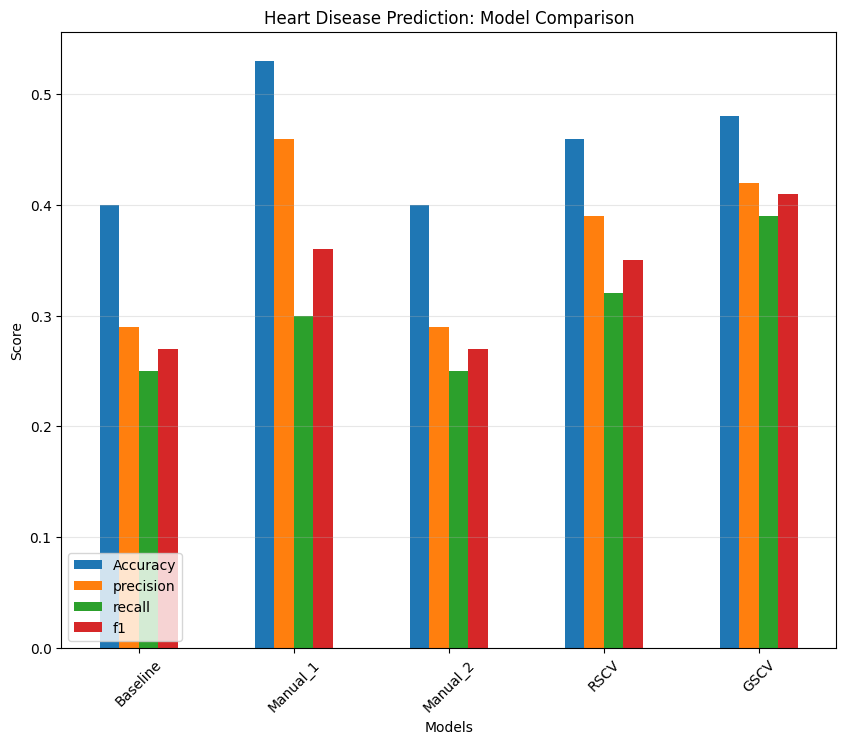

In [19]:
import matplotlib.pyplot as plt # Graph banane ke liye library import ki

# 1. Comparison dataframe ko plot karein
# '.T' ka matlab hai transpose, taake models (Baseline, GSCV) niche (X-axis) par aayein.
# 'kind="bar"' ka matlab hai ke humein bars wala graph chahiye.
comparison.T.plot(kind="bar", figsize=(10, 8)) 

# 2. Graph ka main title (unwan) set kiya
plt.title("Heart Disease Prediction: Model Comparison") 

# 3. Y-axis (vertical line) ka label set kiya ke yeh scores dikha raha hai
plt.ylabel("Score") 

# 4. X-axis (niche wali line) ka label set kiya ke yahan models ke naam hain
plt.xlabel("Models") 

# 5. Models ke naam ko 45 degree par ghuma diya taake woh aapas mein takrayein nahi aur saaf nazar aayein
plt.xticks(rotation=45) 

# 6. 'Legend' (chota box) niche left side par set kiya jo Accuracy/Precision ke colors batata hai
plt.legend(loc='lower left') 

# 7. Graph mein piche halki si lines (grid) add kin taake numbers dekhne mein asaani ho
plt.grid(axis='y', alpha=0.3) 

# 8. Sab kuch set karne ke baad graph ko screen par dikha diya
plt.show()

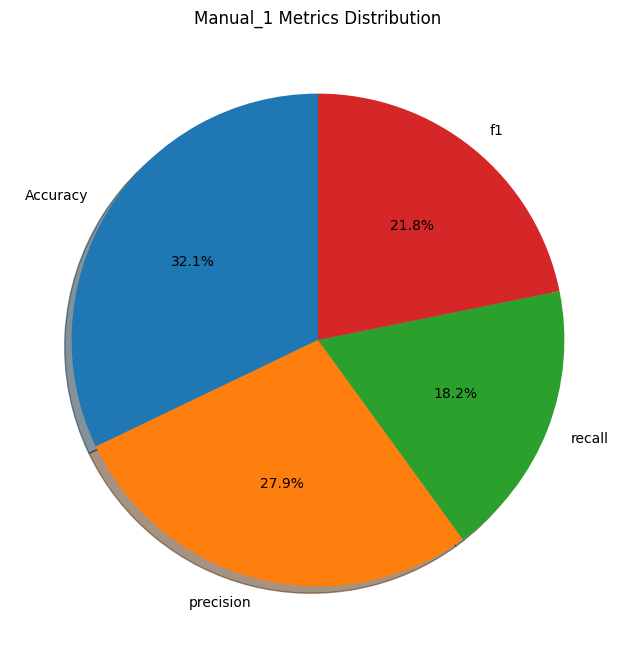

In [20]:
## yeh  m ny  hud lagaya
import matplotlib.pyplot as plt

# 1. Manual_1 ka data select kiya
# .loc['Manual_1'] se humne sirf us model ki row uthayi
manual_metrics = comparison.T.loc['Manual_1']

# 2. Pie chart banaya
# 'autopct' percentage dikhane ke liye hai
manual_metrics.plot(kind='pie', 
                    autopct='%1.1f%%', 
                    figsize=(8, 8), 
                    startangle=90, 
                    shadow=True)

# 3. Title aur label set kiya
plt.title("Manual_1 Metrics Distribution")
plt.ylabel("") # Side wala label khali chora taake saaf dikhe
plt.show()

In [21]:
# by hand
#RSCV
#GSCV

In [22]:
## 1 Getting the Data Ready
## 2 Choosing Machine Learning Model
## 3 Fit Model
## 4 Evaluate Model
## 5 Improve Model
## 6 Saving the Model
## 7 Summary

# Section 22: Scikit Learn Part 06  #189 to 194

# 189. SAVE Load Model With Pickle Method

In [23]:
# Save and Load Model
# Method-1 Pickle
# Method-2 Joblib

In [24]:
import pickle
# save existing Model
pickle.dump(gscv_clf,open("gscv_clf_RFM.pk1","wb"))

In [25]:
pickled_model = pickle.load(open("gscv_clf_RFM.pk1","rb"))

In [26]:
# Make Predictions on the Loaded Model
predicted_pickled = pickled_model.predict(X_test)
evaluate_hyper_metrics(y_test,predicted_pickled)

Accuracy: 0.48
precision: 0.42
Recall: 0.39
f1: 0.41


{'Accuracy': 0.48, 'precision': 0.42, 'recall': 0.39, 'f1': 0.41}

# Section 22: Scikit Learn Part 06  #189 to 194
# 190. Save Load Model With Joblib Method 2

#### Method 2 :: " joblib "  To load saved model or to save model

In [27]:
from joblib import dump,load

# Saving the model
dump(gscv_clf,filename="joblib_gscv_model.joblib")



['joblib_gscv_model.joblib']

In [28]:
# Loading the Model
joblib_model = load(filename="joblib_gscv_model.joblib")

In [29]:
y_joblib_predicted = joblib_model.predict(X_test)
evaluate_hyper_metrics(y_test,y_joblib_predicted)

Accuracy: 0.48
precision: 0.42
Recall: 0.39
f1: 0.41


{'Accuracy': 0.48, 'precision': 0.42, 'recall': 0.39, 'f1': 0.41}

# section 22 # Scikit Learn Part 06| 191.Building Model using Pipline

# ALL IN ONE USING SKLEARN PIPLINE

In [30]:
import pandas as pd
data_p = pd.read_csv("../Data/phone_data_missing_values.csv")
data_p

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043,4,$400.00
1,Samsung,Red,87899,4,$500.00
2,zte,NaN,NaN,NaN,NaN
3,Nokia,Blue,32549,3,$700.00
4,Iphone,Black,11179,5,$220.00
...,...,...,...,...,...
904,Samsung,Blue,45698,4,$750.00
905,Samsung,Blue,54738,4,$700.00
906,Nokia,White,60000,4,$625.00
907,Motorolla,White,31600,4,$970.00


In [56]:
import pandas as pd

# 1. Clean 'Price': Remove any non-numeric symbols and convert to float
data_p['Price'] = pd.to_numeric(data_p['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# 2. Clean 'Memory(kb)': Remove 'kb' and convert to float
data_p['Memory(kb)'] = pd.to_numeric(data_p['Memory(kb)'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# 3. Clean 'Sim Cards': Ensure it's numeric
data_p['Sim Cards'] = pd.to_numeric(data_p['Sim Cards'], errors='coerce')


# --- NOW you can perform your math operations ---

#Fill Colour with Unknown

data_p['Colour'] = data_p['Colour'].fillna('Unknown')

# Fill Price with the average
data_p['Price'] = data_p['Price'].fillna(data_p['Price'].mean())

# Fill Memory with the median
data_p['Memory(kb)'] = data_p['Memory(kb)'].fillna(data_p['Memory(kb)'].median())

# Fill Sim Cards with the mode (most common value) since it's usually a whole number
data_p['Sim Cards'] = data_p['Sim Cards'].fillna(data_p['Sim Cards'].mode()[0])

print(data_p.dtypes)

Make              str
Colour            str
Memory(kb)    float64
Sim Cards     float64
Price         float64
dtype: object


In [57]:
data_p.isna().sum()

Make          0
Colour        0
Memory(kb)    0
Sim Cards     0
Price         0
dtype: int64

In [58]:
# Fill the missing values
# Convert the Data object type into num type
# Build a Model on the Data


In [59]:
# Getting Data Ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(7)

# Section 22:: 192.Building Entire Model using Pipeline Part 2

In [60]:
# Getting Data Ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling ::

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(7)

# Import Data and fill the missing Values

data_p = pd.read_csv("../Data/phone_data_missing_values.csv")
data_p.dropna(subset=["Price"])


,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043,4,$400.00
1,Samsung,Red,87899,4,$500.00
3,Nokia,Blue,32549,3,$700.00
4,Iphone,Black,11179,5,$220.00
5,Motorolla,White,213095,4,$350.00
...,...,...,...,...,...
903,Nokia,Green,99213,4,$450.00
904,Samsung,Blue,45698,4,$750.00
905,Samsung,Blue,54738,4,$700.00
906,Nokia,White,60000,4,$625.00


In [62]:
# 1. Strip 'kb' and any whitespace
clean_memory = data_p['Memory(kb)'].astype(str).str.replace('kb', '', case=False).str.strip()

# 2. Convert to numeric, forcing the "Memory()" text to become NaN
data_p['Memory(kb)'] = pd.to_numeric(clean_memory, errors='coerce')

# 3. Now the rest of your fillna code will work perfectly
data_p['Memory(kb)'] = data_p['Memory(kb)'].fillna(data_p['Memory(kb)'].median())

In [79]:
# 1. Clean Price: Remove '$', ',', and words, then force to numeric
data_p['Price'] = pd.to_numeric(data_p['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# 2. Clean Sim Cards: Force to numeric (this turns 'Sim Cards' text into NaN)
data_p['Sim Cards'] = pd.to_numeric(data_p['Sim Cards'], errors='coerce')
data_p['Sim Cards'] = data_p['Sim Cards'].astype(int)
# 3. Now fill the new NaNs created by the junk rows
data_p['Price'] = data_p['Price'].fillna(data_p['Price'].mean())
data_p['Sim Cards'] = data_p['Sim Cards'].fillna(data_p['Sim Cards'].mode()[0])
data_p['Colour'] = data_p['Colour'].fillna('Unknown')

print(data_p.dtypes)
print(data_p.isna().sum())

Make              str
Colour            str
Memory(kb)    float64
Sim Cards       int64
Price         float64
dtype: object
Make          0
Colour        0
Memory(kb)    0
Sim Cards     0
Price         0
dtype: int64


In [93]:
# Replace the 'Unknown' strings with the most common color
most_common_color = data_p['Colour'].mode()[0]
data_p['Colour'] = data_p['Colour'].replace('Unknown', most_common_color)

# Check the breakdown again
print(data_p['Colour'].value_counts())

Colour
White    455
Blue     195
Red       65
Black     65
Green     65
Name: count, dtype: int64


In [94]:
# Remove any rows where the Colour is literally the word 'Colour'
data_p = data_p[data_p['Colour'] != 'Colour']

# Let's check the clean breakdown
print("Final Colour Breakdown:")
print(data_p['Colour'].value_counts())

Final Colour Breakdown:
Colour
White    455
Blue     195
Red       65
Black     65
Green     65
Name: count, dtype: int64


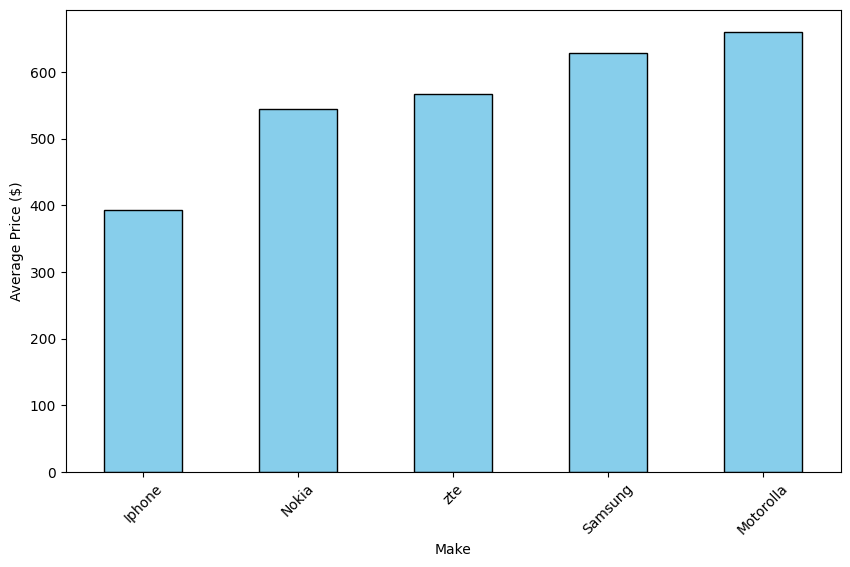

In [95]:
plt.figure(figsize=(10, 6)) # Makes the chart wider
data_p.groupby('Make')['Price'].mean().sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=45) # Tilts the names for better readability
plt.ylabel('Average Price ($)')
plt.show()

In [96]:
data_p.to_csv('Phones_Cleaned_Final.csv', index=False)
print("File saved successfully!")

File saved successfully!


In [9]:
# Duplicates hatane ke liye
data.drop_duplicates(inplace=True)

# Ab check karein kitni rows bachi hain
print(f"Total unique rows: {len(data)}")

Total unique rows: 10


In [10]:
data_c = pd.read_csv("Phones_Cleaned_Final.csv")
data_c.head(20)

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043.0,4,400.0
1,Samsung,Red,87899.0,4,500.0
2,zte,White,57369.0,4,566.5
3,Nokia,Blue,32549.0,3,700.0
4,Iphone,Black,11179.0,5,220.0
5,Motorolla,White,213095.0,4,350.0
6,Iphone,White,57369.0,4,566.5
7,Nokia,Green,99213.0,4,450.0
8,Samsung,Blue,45698.0,4,750.0
9,Samsung,Blue,54738.0,4,700.0


In [12]:
import pandas as pd # Data manipulation aur CSV load karne ke liye
import numpy as np # Math operations aur random seed ke liye
from sklearn.compose import ColumnTransformer # Alag alag columns par alag transformers lagane ke liye
from sklearn.pipeline import Pipeline # Sare steps ko ek sequence mein jodne ke liye
from sklearn.impute import SimpleImputer # Missing values (NaN) ko fill karne ke liye
from sklearn.preprocessing import OneHotEncoder # Text (Categories) ko numbers mein badalne ke liye
from sklearn.ensemble import RandomForestRegressor # Price predict karne wala machine learning model
from sklearn.model_selection import train_test_split # Data ko training aur testing mein divide karne ke liye

# Random seed set kar rahe hain taake result har baar same aaye
np.random.seed(7)

# --- 1. DATA LOAD AUR INITIAL CLEANING ---
# CSV file load ho rahi hai
data = pd.read_csv("../Data/phone_data_larg.csv")

# Jis row mein 'Price' missing hai usay nikaal rahay hain (Target lazmi hona chahiye)
data.dropna(subset=["Price"], inplace=True)

# Price column ki cleaning: $ aur comma hataye lekin decimal (.) ko rehne diya
data["Price"] = data["Price"].astype(str).str.replace(r"[\$\,]", "", regex=True).astype(float)

# Memory column se 'kb' hatana taake wo number ban sakay
data["Memory(kb)"] = data["Memory(kb)"].astype(str).str.replace("kb", "", case=False)
data["Memory(kb)"] = pd.to_numeric(data["Memory(kb)"], errors="coerce")

# --- 2. PIPELINES (Data ki tayari) ---

# Text columns (Make, Colour) ke liye: Missing ko 'missing' likho aur phir One-Hot encode karo
cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Sim Cards ke liye: Missing ko number 4 se fill karo
sim_features = ["Sim Cards"]
sim_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

# Memory ke liye: Missing values ko column ke average (mean) se fill karo
num_features = ["Memory(kb)"]
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# --- 3. PREPROCESSING AUR MODEL KO JODNA ---

# ColumnTransformer ke zariye oper wale saaray transformers ko columns par apply karna
preprocessing = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cat_features),
        ("sim", sim_transformer, sim_features),
        ("num", num_transformer, num_features)
    ]
)

# Final Pipeline: Pehle data clean hoga (preprocessing) phir model train hoga
model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor())
])

# --- 4. DATA SPLIT AUR TRAINING ---

# X mein features hain aur y mein target (Price)
X = data.drop("Price", axis=1)
y = data["Price"]

# 80% data training ke liye aur 20% testing ke liye
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model ko train kar rahe hain
model.fit(X_train, y_train)

# Model ki performance check karna (R^2 Score)
model_score = model.score(X_test, y_test)
print(f"Model Score (R^2): {model_score:.4f}")

Model Score (R^2): 1.0000


In [13]:
# Duplicates hatane ke liye
data.drop_duplicates(inplace=True)

# Ab check karein kitni rows bachi hain
print(f"Unique rows after cleaning: {len(data)}")

Unique rows after cleaning: 10


In [14]:
import pandas as pd # Data ko table format mein handle karne aur CSV read karne ke liye
import numpy as np # Mathematics aur random numbers ke liye
from sklearn.compose import ColumnTransformer # Alag alag columns (text vs number) ko handle karne ke liye
from sklearn.pipeline import Pipeline # Cleaning aur Modeling ko ek sath jodne ke liye
from sklearn.impute import SimpleImputer # Khali jaghon (NaN) ko bharne ke liye
from sklearn.preprocessing import OneHotEncoder # Text (Categories) ko numbers mein convert karne ke liye
from sklearn.ensemble import RandomForestRegressor # Machine Learning algorithm jo price predict karega
from sklearn.model_selection import train_test_split # Data ko Training aur Testing mein baantne ke liye

# --- 1. DATA KI TAYARI (INITIAL CLEANING) ---
# Data load karna
data = pd.read_csv("../Data/phone_data_larg.csv")

# Price column se $ aur comma hatana, lekin decimal (.) ko rehne dena
data["Price"] = data["Price"].astype(str).str.replace(r"[\$\,]", "", regex=True).astype(float)

# Memory se 'kb' hatana taake wo machine ke liye sirf ek number ban jaye
data["Memory(kb)"] = data["Memory(kb)"].astype(str).str.replace("kb", "", case=False)
data["Memory(kb)"] = pd.to_numeric(data["Memory(kb)"], errors="coerce")

# Jis row mein Price missing ho, usay delete kar dena
data.dropna(subset=["Price"], inplace=True)

# --- 2. TRANSFORMERS (CLEANING KA PLAN) ---

# Categorical data (Make, Colour) ke liye: Khali jagah par 'missing' likho aur phir encode karo
cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Sim Cards ke liye: Khali jagah par number 4 bhar do
sim_features = ["Sim Cards"]
sim_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

# Memory ke liye: Khali jagah par column ka Average (Mean) bhar do
num_features = ["Memory(kb)"]
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# --- 3. PREPROCESSING AUR MODEL KO JODNA ---

# ColumnTransformer sab transformers ko apne apne columns par apply karta hai
preprocessing = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cat_features),
        ("sim", sim_transformer, sim_features),
        ("num", num_transformer, num_features)
    ]
)

# Final Pipeline: Pehle preprocessing hogi, phir model train hoga
model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor())
])

# --- 4. DATA SPLIT AUR TRAINING ---
X = data.drop("Price", axis=1) # Input data
y = data["Price"] # Output (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model ko train karna
model.fit(X_train, y_train)

# Result check karna
print(f"Model R^2 Score: {model.score(X_test, y_test):.4f}")

# --- 5. NAYE DATA PAR PREDICTION ---
test_phone = pd.DataFrame({
    "Make": ["Samsung"],
    "Colour": ["White"],
    "Memory(kb)": [128000.0],
    "Sim Cards": [2]
})

predicted_price = model.predict(test_phone)
print(f"The predicted price for this phone is: ${predicted_price[0]:.2f}")

Model R^2 Score: 1.0000
The predicted price for this phone is: $382.50


In [15]:
# Bilkul naya phone jo data mein nahi hai
new_test = pd.DataFrame({
    "Make": ["Samsung"],
    "Colour": ["Purple"], # Naya rang
    "Memory(kb)": [999999.0], # Bohat zyada memory
    "Sim Cards": [1]
})

print(f"Predicted Price: {model.predict(new_test)}")

Predicted Price: [422.5]
